In [16]:
import pandas as pd
import numpy as np

In [17]:
data=pd.read_csv('data\gemstone.csv')

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Jolly\AppData\Local\Temp\ipykernel_27588\1250993730.py:1: SyntaxWarning: invalid escape sequence '\g'
  data=pd.read_csv('data\gemstone.csv')


In [18]:
data.drop(['id'], axis=1, inplace=True)


In [19]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [20]:
x=data.drop(['price'], axis=1)

In [21]:
y=data[['price']]

In [22]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [23]:
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [24]:
x.select_dtypes(include='object')

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [25]:
catcol=x.select_dtypes(include='object').columns

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
dtypes: float64(6), object(3)
memory usage: 13.3+ MB


In [27]:
numcol=x.select_dtypes(include='float').columns

In [28]:
catcol

Index(['cut', 'color', 'clarity'], dtype='object')

In [29]:
cutcat=list(data['cut'].unique())
colorcat=list(data['color'].unique())
claritycat=list(data['clarity'].unique())

In [30]:
cutcat

['Premium', 'Very Good', 'Ideal', 'Good', 'Fair']

In [31]:
from sklearn.impute import SimpleImputer #Handing Missing Values
from sklearn.preprocessing import StandardScaler #Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Handling Ordinal Encoding

###pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [32]:
numpipe=Pipeline(

    steps=[
        ('imputer', SimpleImputer()),
        ('scalar', StandardScaler())
    ]
)

In [33]:
catpipe=Pipeline(

    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[cutcat,colorcat,claritycat]))
    ]
)

In [34]:
preprocess=ColumnTransformer(
    [
        ('numpipe',numpipe,numcol),
        ('catpipe',catpipe,catcol)
    ]
)

In [35]:
#train test split

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30, random_state=30)

In [36]:
xtrain

,carat,cut,color,clarity,depth,table,x,y,z
168192,0.34,Ideal,I,VVS2,60.9,57.0,4.56,4.53,2.76
35202,0.90,Good,E,SI1,63.8,57.0,6.07,6.03,3.87
41091,1.02,Premium,G,VS1,62.7,58.0,6.35,6.39,4.00
31239,0.32,Premium,G,VS2,62.1,59.0,4.37,4.35,2.71
45722,0.35,Ideal,J,VVS2,61.1,56.0,4.53,4.57,2.78
...,...,...,...,...,...,...,...,...,...
66455,0.31,Ideal,E,SI1,61.8,56.0,4.31,4.35,2.68
46220,1.25,Ideal,G,SI2,62.0,56.0,6.88,6.95,4.28
98804,1.00,Good,G,SI1,63.5,56.0,6.29,6.37,4.02
48045,1.10,Ideal,G,VS1,59.9,60.0,6.68,6.77,4.01


In [37]:
xtest

,carat,cut,color,clarity,depth,table,x,y,z
70432,0.53,Premium,E,VS2,60.8,56.0,5.24,5.21,3.19
64839,0.71,Very Good,H,SI1,62.9,57.0,5.67,5.69,3.56
185316,0.30,Ideal,H,IF,62.1,57.0,4.27,4.29,2.66
84658,1.24,Premium,G,VS2,61.6,61.0,6.88,6.82,4.21
31953,0.36,Premium,E,VS1,60.4,58.0,4.60,4.63,2.80
...,...,...,...,...,...,...,...,...,...
192694,1.26,Very Good,H,VS2,63.1,56.0,6.83,6.87,4.33
133935,0.33,Ideal,F,VVS1,62.1,55.0,4.45,4.48,2.77
44763,0.70,Premium,J,VS2,58.2,60.0,5.83,5.80,3.38
29856,0.41,Ideal,G,SI1,61.6,57.0,4.77,4.75,2.93


In [38]:
ytrain

,price
168192,765
35202,4763
41091,6139
31239,720
45722,774
...,...
66455,544
46220,5694
98804,4563
48045,6998


In [39]:
ytest

,price
70432,1607
64839,2211
185316,764
84658,7655
31953,735
...,...
192694,5785
133935,914
44763,2010
29856,923


In [40]:
preprocess.fit_transform(xtrain)

array([[-0.97543926, -0.84960654, -0.12153081, ...,  2.        ,
         6.        ,  5.        ],
       [ 0.2351953 ,  1.83363716, -0.12153081, ...,  3.        ,
         3.        ,  3.        ],
       [ 0.49461699,  0.81585507,  0.39980029, ...,  0.        ,
         2.        ,  2.        ],
       ...,
       [ 0.45138004,  1.55606023, -0.6428619 , ...,  3.        ,
         2.        ,  3.        ],
       [ 0.66756478, -1.77486298,  1.44246248, ...,  2.        ,
         2.        ,  2.        ],
       [ 0.25681377,  0.81585507, -0.12153081, ...,  2.        ,
         2.        ,  3.        ]])

In [41]:
preprocess.transform(xtest)

array([[-0.56468825, -0.94213218, -0.6428619 , ...,  0.        ,
         3.        ,  0.        ],
       [-0.17555571,  1.00090636, -0.12153081, ...,  1.        ,
         5.        ,  3.        ],
       [-1.06191316,  0.2607012 , -0.12153081, ...,  2.        ,
         5.        ,  4.        ],
       ...,
       [-0.19717419, -3.34779894,  1.44246248, ...,  0.        ,
         1.        ,  0.        ],
       [-0.82410994, -0.20192702, -0.12153081, ...,  2.        ,
         2.        ,  3.        ],
       [ 2.61322747, -0.75708089,  1.44246248, ...,  0.        ,
         1.        ,  0.        ]])

In [42]:
preprocess.get_feature_names_out()

array(['numpipe__carat', 'numpipe__depth', 'numpipe__table', 'numpipe__x',
       'numpipe__y', 'numpipe__z', 'catpipe__cut', 'catpipe__color',
       'catpipe__clarity'], dtype=object)

In [43]:
xtrain=pd.DataFrame(preprocess.fit_transform(xtrain), columns=preprocess.get_feature_names_out())
xtest=pd.DataFrame(preprocess.fit_transform(xtest), columns=preprocess.get_feature_names_out())

In [44]:
xtrain

,numpipe__carat,numpipe__depth,numpipe__table,numpipe__x,numpipe__y,numpipe__z,catpipe__cut,catpipe__color,catpipe__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,2.0,6.0,5.0
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,3.0,3.0,3.0
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,0.0,2.0,2.0
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,0.0,2.0,0.0
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...
135496,-1.040295,-0.016876,-0.642862,-1.268122,-1.244270,-1.239078,2.0,3.0,3.0
135497,0.991842,0.168176,-0.642862,1.048629,1.114501,1.079486,2.0,2.0,1.0
135498,0.451380,1.556060,-0.642862,0.516768,0.588314,0.702719,3.0,2.0,3.0
135499,0.667565,-1.774863,1.442462,0.868337,0.951202,0.688228,2.0,2.0,2.0


In [45]:
#linear regression
#ridge regression
#lasso regrssion
#elasticnet regrssion

In [46]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

LinearRegression()
model traing performance
rmse: 1198.836771386259
mae: 726.4770041022183
R2 score 0.9117695825448252



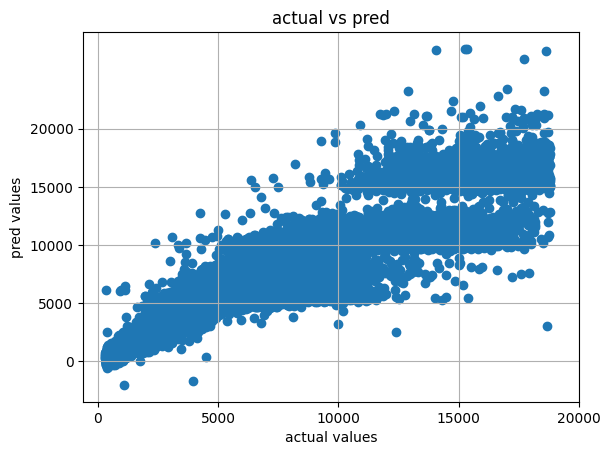

Lasso()
model traing performance
rmse: 1198.7265943339708
mae: 727.9677894724697
R2 score 0.9117857991321955



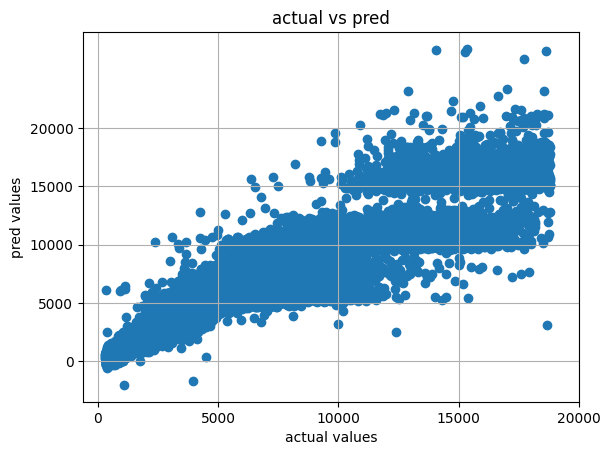

Ridge()
model traing performance
rmse: 1198.83820946609
mae: 726.5043251518971
R2 score 0.9117693708688691



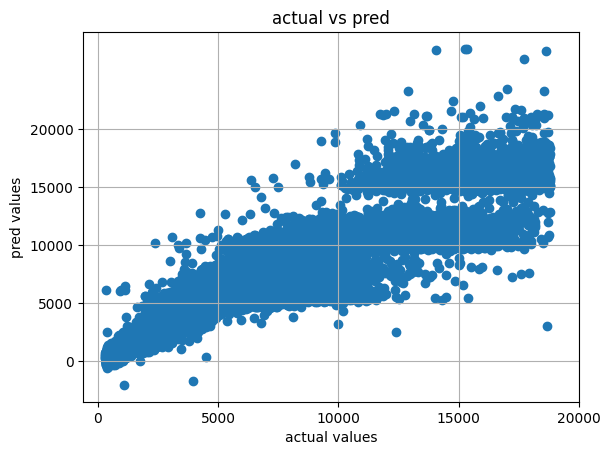

ElasticNet()
model traing performance
rmse: 1629.0435344745101
mae: 1135.9575735065557
R2 score 0.8370840503421804



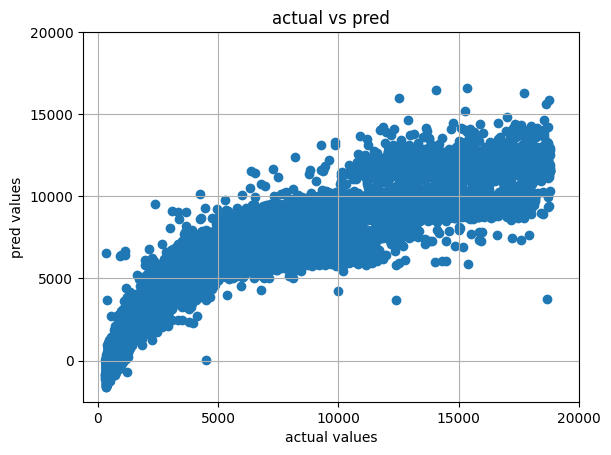

In [68]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
}

import numpy as np

def eval8(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2sq=r2_score(true,predicted)

    return mae, rmse, r2sq

model_list=[]
r2_list=[]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

for model in models.values():
    model.fit(xtrain,ytrain)

    #make prediction
    ypred=model.predict(xtest)
 
    mae,rmse,r2sq=eval8(ytest,ypred)

    model_list.append((str(model)))
    print(model)

    print('model traing performance')
    print('rmse:',rmse)
    print('mae:', mae)
    print('R2 score', r2sq)

    r2_list.append(r2sq)

    print('='*40)
    print()

   #? plt.figure(figsize=(8,8))
    plt.scatter(ytest, ypred)
    plt.xticks(np.arange(0,25000,5000))
    plt.yticks(np.arange(0,25000,5000))
    plt.xlabel('actual values')
    plt.ylabel('pred values')
    plt.title('actual vs pred')
    plt.grid(True)
    plt.show()



    